In [2]:
import numpy as np
import pandas as pd
import utils as ut
import seaborn as sns
import matplotlib as plt
import concurrent.futures as cf
from sklearn.feature_selection import SelectKBest
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import  accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers



In [36]:
# se collem os datos
X_1=pd.read_csv("C:/Users/Joni/Desktop/portfolio/Data analisys/the bridge data sci/american express/scripts/month_1/train_month1.csv")
X_2=pd.read_csv("C:/Users/Joni/Desktop/portfolio/Data analisys/the bridge data sci/american express/scripts/month_2/train_month2.csv")
X_3=pd.read_csv("C:/Users/Joni/Desktop/portfolio/Data analisys/the bridge data sci/american express/scripts/month_3/train_month3.csv")
X_4=pd.read_csv("C:/Users/Joni/Desktop/portfolio/Data analisys/the bridge data sci/american express/scripts/month_4/train_month4.csv")
X_5=pd.read_csv("C:/Users/Joni/Desktop/portfolio/Data analisys/the bridge data sci/american express/scripts/month_5/train_month5.csv")
X_6=pd.read_csv("C:/Users/Joni/Desktop/portfolio/Data analisys/the bridge data sci/american express/scripts/month_6/train_month6.csv")
X_7=pd.read_csv("C:/Users/Joni/Desktop/portfolio/Data analisys/the bridge data sci/american express/scripts/month_7/train_month7.csv")
X_13=pd.read_csv("C:/Users/Joni/Desktop/portfolio/Data analisys/the bridge data sci/american express/scripts/month_13/train_month13_1.csv")
y=pd.read_csv("C:/Users/Joni/Desktop/portfolio/Data analisys/the bridge data sci/american express/scripts/month_1/train_labels.csv")

In [4]:
# see colle das colunas que tem mais meses por cliente o ultimo mese

X_1=X_1.iloc[:,1:]
X_2=X_2.iloc[:,1:]
X_3=X_3.iloc[:,1:]
X_4=X_4.iloc[:,1:]
X_5=X_5.iloc[:,1:]
X_6=X_6.iloc[:,1:]
X_7=X_7.iloc[:,1:]

X=pd.concat([X_2,X_3,X_4,X_5,X_6,X_7])


X_13=X_13.iloc[:,1:]



del X_2,X_3,X_4,X_5,X_6,X_7

with cf.ThreadPoolExecutor() as excutor:
    X=pd.concat(list(excutor.map(lambda x:ut.get_last(X,x),X["customer_ID"].unique())),axis=1)

X=X.T

X=pd.concat([X,X_1])
del X_1




In [29]:
# se equilibra o target
equi_X,_,equi_y,_=ut.equ_train(X,y,0,1)

<AxesSubplot: xlabel='target', ylabel='count'>

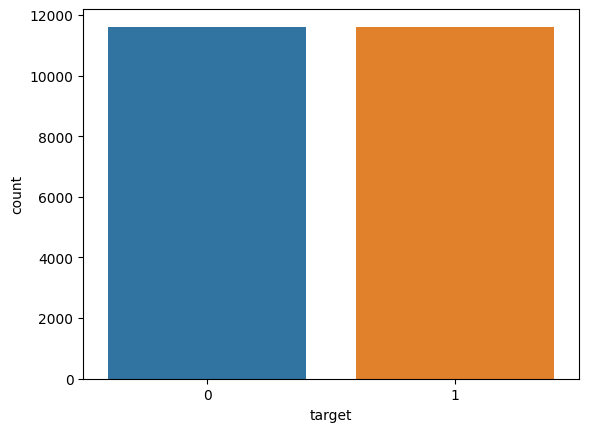

In [31]:
equi_y=equi_y.groupby("target")["target"].count()
equi_y=equi_y.to_frame().rename(columns={"target":"count"}).reset_index()
sns.barplot(x=equi_y["target"],y=equi_y["count"])

In [ ]:
equi_X.to_csv("final_train_X.csv")
equi_y.to_csv("final_train_y.csv")
